# Task

You work for an investment firm.

Your manager hears that you have been experimenting building models for the California housing market.

They ask you whether you could create a model for a specific area that they are interested in investing in.

You agree and they send you through some data.

The deliverables for this are:
- a presentation about your insights into the market you have gained from the data
-  A proof of concept model

Afterwards, it will be decided whether or not it would be worthwhile spending money to acquire more data and develop it further.

Unfortunately, your manager didnt give you much guidance beyond the brief. They didn't know what the file contained, or communicate any other information to you. In fac, after sending the file they signed off and went on leave with the parting words "i'm sure you'll do great".

You have to present your initial proof of concept tomorrow to the wider team.

There is quite a lot to sort out before then!

##### You can use the skeleton laid out below as a guide or you can choose to take your own direction with it

##### Skills required
- Basic Python
- Data manipulation and Vizualisation in Pandas and MatplotLib, Seaborn etc
- Data Prep, cleaning, scaling etc
- Linear Regression Modelling in SKLearn
- Clear communication skills to effectively convey the limitations of the model built





In [57]:
import pandas as pd

In [58]:
# first thing to do is to read in the data
df = pd.read_csv('Real estate.csv')

In [59]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


What are the first issues we can see?
 - There is no location, or explanation of of the units of price
 - We don't know whether this price column referrs to renting or buying or what currency
 - The date column, this is a frequent issue
 - thankfully no missing values but we should investiage further to see if we have negatives etc
 - Only 414 rows of data, this is only a POC and all we can do it go with what we have

Well, some things we can fix:
- Firstly, go and find out where exactly these properties are
  - Wouldn't look to good giving a presentation on a housing market and not knowing where it was
- As for the price, would it be possible to continue building?
 - Yes we can
 - It doesnt really matter what the units are or what currency
 - We can deal with this later
 
- The date column
 - As we are building a Mutli Linear Regression and not a time series we could just extract the year
   - This is not a straightforward date to deal with, the year will suffice for now

In [61]:
# Where is this data referring to??
# Find a way to identify where these locations are..... Google is your friend

# Can us google maps, or
# https://www.findlatitudeandlongitude.com/find-address-from-latitude-and-longitude/

# It is also important to check the range, we could plot to identify outliers

In [62]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

#### Get rid of uneeded columns

In [63]:
df.drop(columns = 'No', inplace = True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Obvious errors or placeholders fo NANs


In [64]:
# Describe all columns
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


No negative values or anything obvious<br>
There is quite a range of house prices, from 7.6 per unit area to 117, we can look at this on a scatter plot of the locations in the EDA

##### The location

<AxesSubplot:xlabel='X5 latitude', ylabel='X6 longitude'>

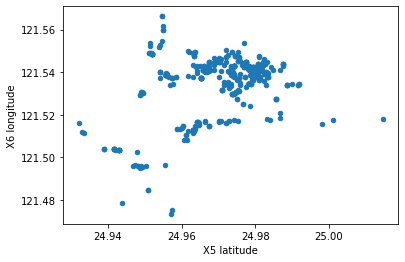

In [65]:
# Plotting lat and long
df.plot.scatter('X5 latitude','X6 longitude')

In [66]:
# No Obvious outliers, ie looks like everything may be in the same city, the lat varies very little
# and long by just over one degree.
# Numeric display
df[['X5 latitude','X6 longitude']].describe()

,X5 latitude,X6 longitude
count,414.000000,414.000000
mean,24.969030,121.533361
std,0.012410,0.015347
min,24.932070,121.473530
25%,24.963000,121.528085
50%,24.971100,121.538630
75%,24.977455,121.543305
max,25.014590,121.566270


#### After taking a random sample and searching
#### The location is Taipei

### I will rename the columns for convienience

In [67]:
# calling current column names
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [68]:
# reassigning
df.columns = ['year','age','mrt','stores','lat','long','price'] 

In [69]:
# examining
df.head()

,year,age,mrt,stores,lat,long,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### The date column

In [70]:
# Extracting the year from the date column
df['year'] = df['year'].apply(int)

# examing the spread of years
df['year'].value_counts()

2013    288
2012    126
Name: year, dtype: int64

#### Initial EDA
- Explore the data frame
- Check ranges and distributions of the data
- Plot the target over the distirbutions
- Investigate the correlation between all variables
- If you are going to use some of these charts in a presentation, make sure they look good,
  - choose nice colour pallettes
  - ensure axis are labelled
  - make sure the charts are easy to understand
  
  
You dont need to build a Power Point presesntation for this task, just create charts that you would be happy to includs in one

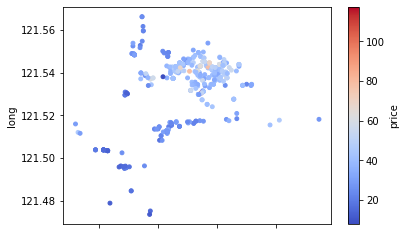

In [71]:
# examaning locaion and price
df.plot.scatter(x='lat',y='long', c = 'price', cmap = 'coolwarm', s=15);

 As expected more expensive in the city

In [72]:
df.columns

Index(['year', 'age', 'mrt', 'stores', 'lat', 'long', 'price'], dtype='object')

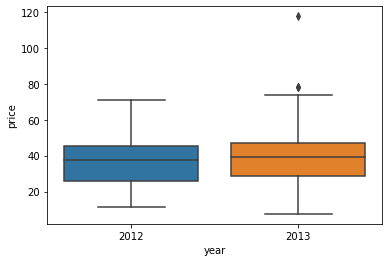

In [73]:
# Examing distribution of target by year
import seaborn as sns

sns.boxplot(data = df,
            x='year',
            y='price', 
            orient = 'v');

In [74]:
# examining mean of both years
df.groupby('year').agg({'price': ['mean']}).reset_index()

,year,price
,,mean
0,2012,36.304762
1,2013,38.713194


In [75]:
# examining price again
df['price'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: price, dtype: float64

In [76]:
# doesnt look like year will be much use to us, dropping the column
df.drop(columns = 'year', inplace = True)

# Examine correlations

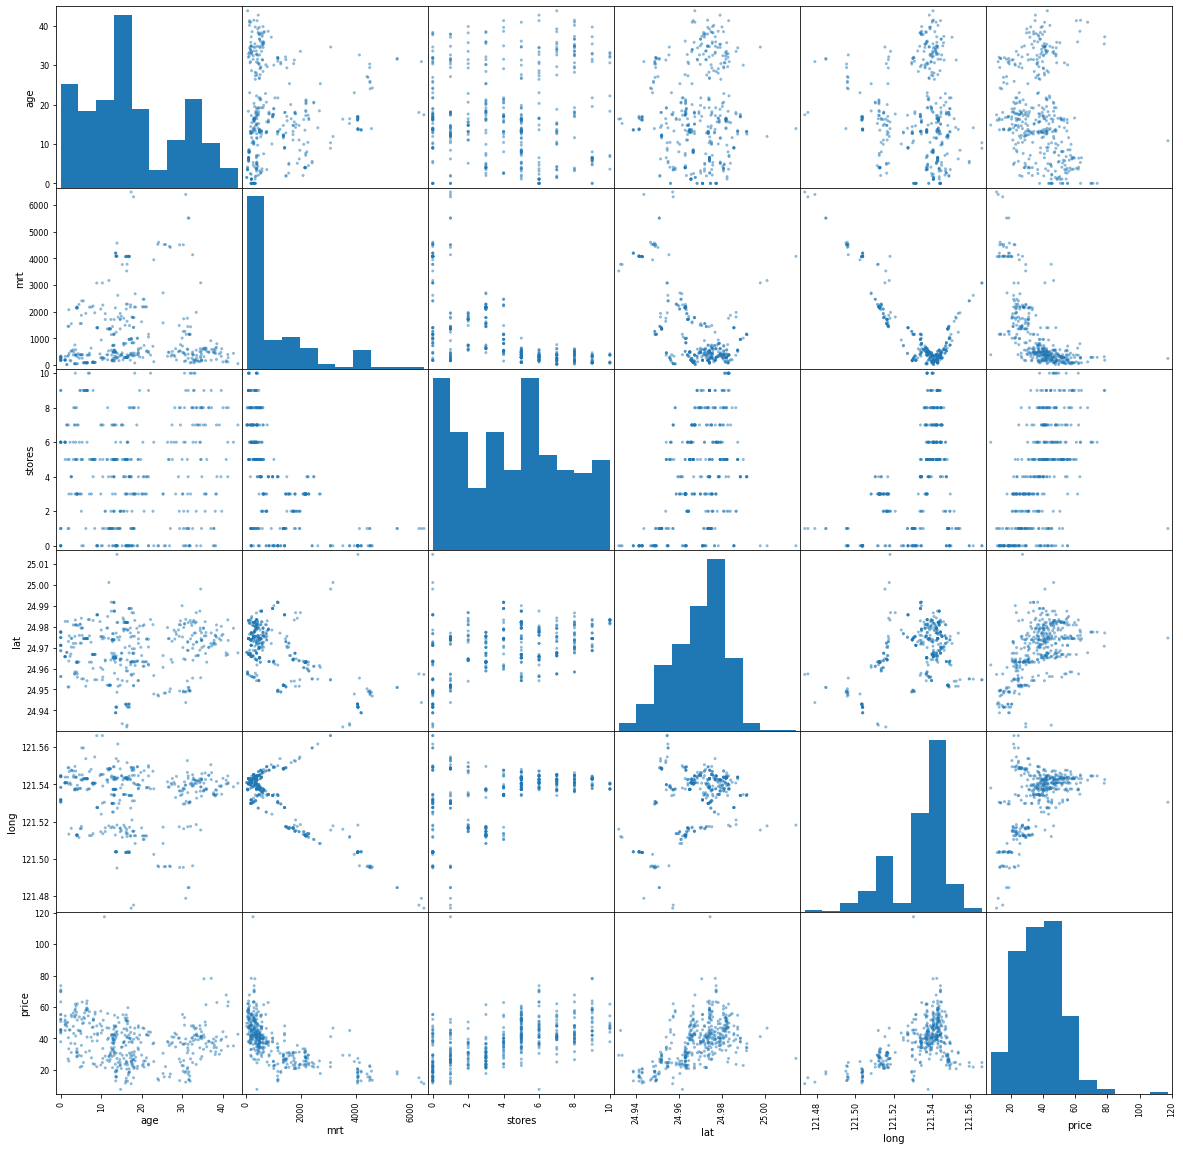

In [77]:
# plot scatter plots
pd.plotting.scatter_matrix(df,figsize = (20,20));

No Obvious outliers present

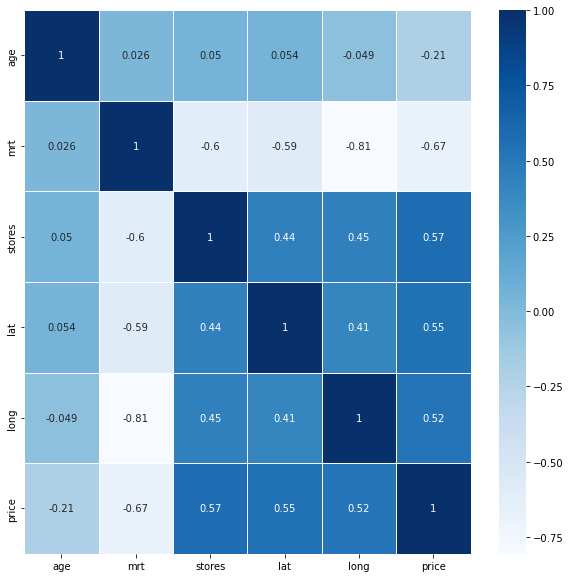

In [78]:
import matplotlib.pyplot as plt

# Creating an axes on which to draw the heatmap
fig, ax =  plt.subplots(figsize = (10,10))

# Note: there is an exercise sheet on Matplot lib which you may find useful in understanding about figures and axes

# Plotting the heatmap on the axes
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=0.8, ax=ax, cmap = 'Blues');

In [79]:
# Just examing correlation with target variable
df.corr(method='pearson')['price'].sort_values(ascending = False)


price     1.000000
stores    0.571005
lat       0.546307
long      0.523287
age      -0.210567
mrt      -0.673613
Name: price, dtype: float64

<AxesSubplot:xlabel='mrt', ylabel='price'>

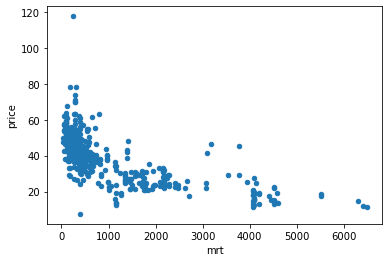

In [80]:
# Looking at distance to mrt and target
df.plot.scatter(x='mrt',y='price')

#### Ideas for data viz

Lets create a new column for above and below mean price, we can then view the distribution of this over our other variables

In [81]:
import numpy as np
mean_price = df['price'].mean()
upper_quartile = df['price'].quantile(0.75)
df['price_range'] = np.where(df['price'] <= upper_quartile, 'below', 'above' )

In [82]:
df.head()

,age,mrt,stores,lat,long,price,price_range
0,32.0,84.87882,10,24.98298,121.54024,37.9,below
1,19.5,306.59470,9,24.98034,121.53951,42.2,below
2,13.3,561.98450,5,24.98746,121.54391,47.3,above
3,13.3,561.98450,5,24.98746,121.54391,54.8,above
4,5.0,390.56840,5,24.97937,121.54245,43.1,below


we can see the distribution of above average prices in relation to the proximity to mrt stations

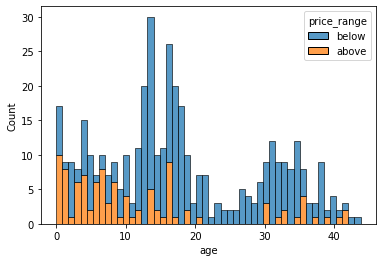

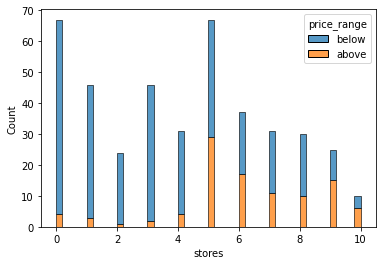

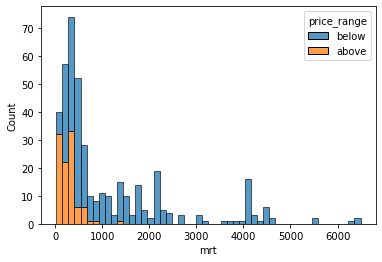

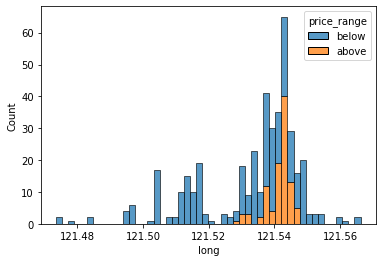

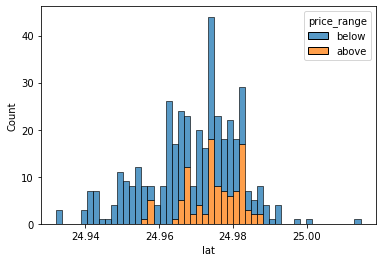

In [83]:
for column in ['age','stores','mrt','long','lat']:
    sns.histplot(data = df,
                 x=column, 
                 hue = 'price_range',
                 multiple="stack",
                 bins = 50);
    plt.show()
    

In [84]:
# getting rid of the price range column
df.drop(columns = 'price_range', inplace = True)

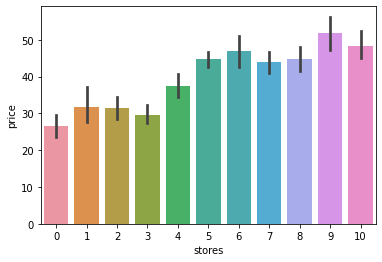

In [85]:
# barplot ofr stores
sns.barplot(data = df,
                x='stores', 
                y='price');


# Outliers
 - shall we reomove?
 - I will remove some outliers into a copy of the data frame
 - Looks like removing some from MRT, Price and long may help
 - What are the effects of this?

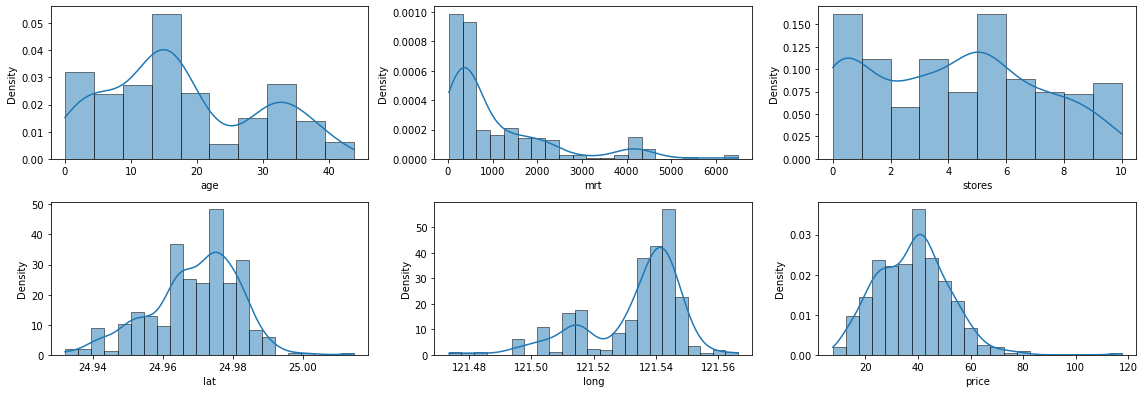

In [86]:
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(df):
    plt.subplot(6,3,index+1)
    sns.histplot(df.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

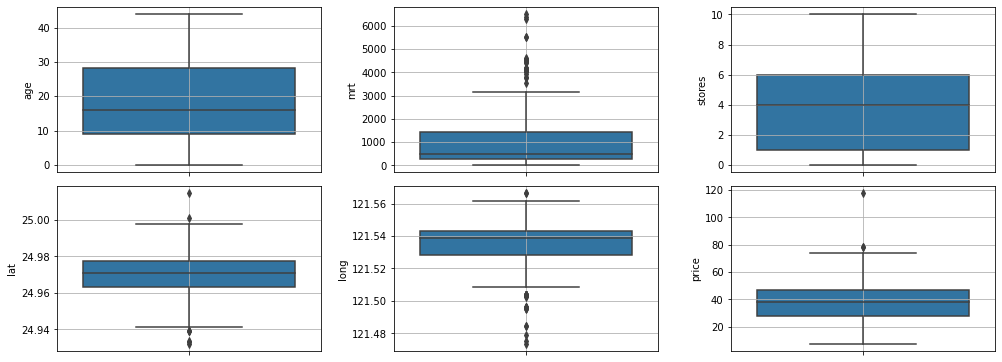

In [87]:
# box plots for outliers also
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(df):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=df)
    plt.grid()
fig.tight_layout(pad=1.0)

In [88]:
# in this case I will remove the outliers by eye, do you agree with my decisions?
df_reduced = df[df['price']<80].copy()
df_reduced = df_reduced[df_reduced['mrt']<3000]
df_reduced = df_reduced[df_reduced['long']>121.50]
df_reduced.reset_index(inplace = True, drop = True)

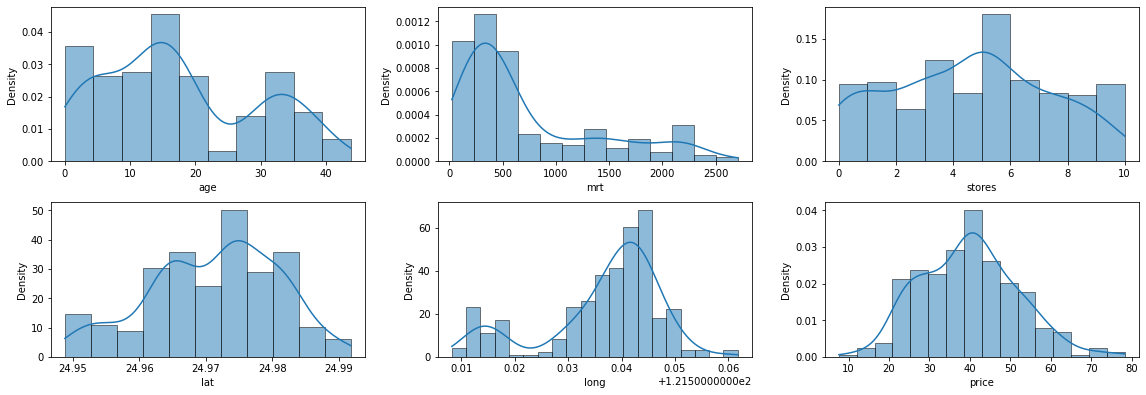

In [89]:
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(df_reduced):
    plt.subplot(6,3,index+1)
    sns.histplot(df_reduced.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

# Create your Train Test Split of the Data

In [90]:
df.columns

Index(['age', 'mrt', 'stores', 'lat', 'long', 'price'], dtype='object')

In [91]:
cols = ['age', 'mrt', 'stores', 'lat', 'long']

In [92]:
# Importing package
from sklearn.model_selection import train_test_split

#Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df[cols],
                                                    df['price'],
                                                    test_size=0.30,
                                                    random_state =42)

In [93]:
#Splitting the reduced data into test and train sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_reduced[cols],
                                                        df_reduced['price'],
                                                        test_size=0.30,
                                                        random_state =42)

# Perform any Re-Scaling you feel is necessary
- why scale after splitting?

In [94]:
# rescaling the data
# importing the package
from sklearn.preprocessing import StandardScaler

# Calling the method twice, once for the features and once for the target
scaler =  StandardScaler()
scaler_target = StandardScaler()

# Fitting the scaler on the training features and applying it to both the training and test data
# Note how the Scaler is only fit to the training set, but then applied to both
X_train[cols] = scaler.fit_transform(X_train.values)
X_test[cols] = scaler.transform(X_test.values)

# Fitting the scaler on the training target and applying it to both the training and test data
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [98]:
# Calling the method twice, once for the features and once for the target
scaler2 =  StandardScaler()
scaler_target2 = StandardScaler()


# Fittinfg on reduced data
# Note how the Scaler is only fit to the training set, but then applied to both
X_train2[cols] = scaler2.fit_transform(X_train2.values)
X_test2[cols] = scaler2.transform(X_test2.values)

# Fitting the scaler on the training target and applying it to both the training and test data
y_train2 = scaler_target2.fit_transform(y_train2.values.reshape(-1, 1))
y_test2 = scaler_target2.transform(y_test2.values.reshape(-1, 1))

In [99]:
# viewing transformed data
X_train.describe()

,age,mrt,stores,lat,long
count,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,1.859335e-16,4.994083e-17,-9.911334e-17,4.323281e-14,6.194756e-14
std,1.001735e+00,1.001735e+00,1.001735e+00,1.001735e+00,1.001735e+00
min,-1.532922e+00,-8.365159e-01,-1.399983e+00,-2.875917e+00,-3.869248e+00
25%,-7.862044e-01,-6.231318e-01,-1.064776e+00,-5.227745e-01,-2.632034e-01
50%,-1.185508e-01,-4.603255e-01,-5.915423e-02,1.618924e-01,3.468666e-01
75%,9.444241e-01,2.989965e-01,6.112603e-01,7.417797e-01,6.373130e-01
max,2.218237e+00,4.204597e+00,1.952089e+00,3.599624e+00,2.172435e+00


In [100]:
X_train2.describe()

,age,mrt,stores,lat,long
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02
mean,2.277025e-16,2.903660e-17,-1.827598e-16,1.420458e-13,3.825720e-13
std,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00,1.001929e+00
min,-1.476345e+00,-1.072188e+00,-1.701187e+00,-2.309404e+00,-2.569839e+00
25%,-7.874235e-01,-6.914462e-01,-6.063637e-01,-6.593565e-01,-3.499949e-01
50%,-1.587831e-01,-4.123650e-01,1.235185e-01,1.362429e-01,3.377632e-01
75%,8.939744e-01,6.545511e-01,8.534008e-01,7.601376e-01,6.460686e-01
max,2.295498e+00,3.017919e+00,1.948224e+00,2.065247e+00,2.157663e+00


# Build your models and assses the best combination of features
 - What defines the best combination?
 - Which metric will  you use?
 - Investment firms are all about margins, could this help?<br>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html

In [109]:
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# defining list of al columns
all_features = list(X_train.columns)

# creating a dictionary to hold results
results = {}

# Looping through number of possible combinations of features
for number_of_features in range(1,len(X_train.columns)+1):

    # create all combinations of this number
    sub_set = list(combinations(all_features,number_of_features))

    # looping through all combinations
    for features in sub_set:

        # defining the list of features from this combination
        cols = list(features)

        # call the method
        regressor = LinearRegression(fit_intercept = False)

        # Fit the model
        regressor.fit(X_train[cols].values,y_train)

        # Carry out predictions on our test set
        y_pred = regressor.predict(X_test[cols].values)

        # first we need to reverse the transformation so we have meanginful results
        y_true = scaler_target.inverse_transform(y_test)
        y_pred = scaler_target.inverse_transform(y_pred)

        # Calculating the errors
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)

        # Calculting the R^2
        r2 = r2_score(y_true, y_pred)

        results[str(cols)] = {'RMSE':rmse,
                             'r^2': r2}

df_results = pd.DataFrame.from_dict(results, orient = 'index')
df_results.reset_index(inplace=True)
df_results.columns = ['Features','RMSE','R2']
df_results.sort_values(by='RMSE', inplace=True);

In [110]:
df_results.head()

,Features,RMSE,R2
25,"['age', 'mrt', 'stores', 'lat']",8.559807,0.561846
30,"['age', 'mrt', 'stores', 'lat', 'long']",8.605769,0.557128
15,"['age', 'mrt', 'stores']",8.694004,0.548000
28,"['age', 'stores', 'lat', 'long']",8.714612,0.545855
26,"['age', 'mrt', 'stores', 'long']",8.746304,0.542546


#### On the data with outlier removed
- will this help our model

In [103]:
# defining list of al columns
all_features = list(X_train2.columns)

# creating a dictionary to hold results
results = {}

# Looping through number of possible combinations of features
for number_of_features in range(1,len(X_train2.columns)+1):

    # create all combinations of this number
    sub_set = list(combinations(all_features,number_of_features))

    # looping through all combinations
    for features in sub_set:

        # defining the list of features from this combination
        cols = list(features)

        # call the method
        regressor2 = LinearRegression(fit_intercept = False)

        # Fit the model
        regressor2.fit(X_train2[cols].values,y_train2)

        # Carry out predictions on our test set
        y_pred2 = regressor2.predict(X_test2[cols].values)

        # first we need to reverse the transformation so we have meanginful results
        y_true2 = scaler_target2.inverse_transform(y_test2)
        y_pred2 = scaler_target2.inverse_transform(y_pred2)

        # Calculating the errors
        mae = mean_absolute_error(y_true2, y_pred2)
        mse = mean_squared_error(y_true2, y_pred2)
        rmse = np.sqrt(mse)

        # Calculting the R^2
        r2 = r2_score(y_true2, y_pred2)

        results[str(cols)] = rmse

df_results = pd.DataFrame.from_dict(results, orient = 'index')
df_results.reset_index(inplace=True)
df_results.columns = ['Features','RMSE']
df_results.sort_values(by='RMSE', inplace=True)
df_results.head()

,Features,RMSE
30,"['age', 'mrt', 'stores', 'lat', 'long']",7.762538
25,"['age', 'mrt', 'stores', 'lat']",7.768425
26,"['age', 'mrt', 'stores', 'long']",8.141424
15,"['age', 'mrt', 'stores']",8.144217
27,"['age', 'mrt', 'lat', 'long']",8.147590


# Write a function that takes in a row of data and outputs whether or not your model thinks it is undervalued and by how much

In [52]:
def asses_value(details):
    
    scaled_input = scaler2.transform(details[:5].values.reshape(1, -1))
    y_true = details[:-1]

    prediction = regressor2.predict(scaled_input)
    
    y_true = details[-2]
    y_pred = scaler_target.inverse_transform(prediction)
    
    if y_true < y_pred:
        print('undervalued by = ', round(float(y_pred - y_true),3))
        
    else:
        print('overvalued by = ',round(float( y_true - y_pred),3))

In [53]:
asses_value(df_reduced.iloc[54])

overvalued by =  103.794


# Can you write a similiar function that will take in multiple rows of data, and return only those that your model thinks is undervalued along with the amount. 
 - The Final output of this would be good in a DataFrame

# Display the models performance in some way fit for your presentation

# Summarise the limitations of your model and make suggestions for improving and moving forward 